# Airport Area Survey Exploratory Data Analysis

PART operates 5 shuttles in the airport area and this notebook is one piece of an evaluation of the shuttle service. The notebook contains a data analysis of survey results PART sent out to airport area employers. This was an attempt to gather data on airport area employees' commutes and work hours in the hopes of better structuring the shuttle system.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read in the data as a new dataframe
df = pd.read_excel('!Working_Airport Area Transportation Survey Results.xlsx')

In [3]:
# Check the head of the dataframe
df.head()

,Company Name,Company Address,Latitude,Longitude,Full_Time,Monday,Tuesday,Wednesday,Thursday,Friday,...,Traffic and congestion,Cost of getting to work,Time spent getting to work,Lack of other options to get to work,Parking at work,Other Challenges Getting to Work,Did you know that the airport and surrounding area was served by PART,Would you consider using the bus,Why wouldn’t you use the bus?,Is there something we can provide to help you try using the PART Express bus? Please make sure to provide your contact information later so we can follow-up with you.
0,Enterprise Holdings,620 Rental Car Dr,36.111654,-79.929591,Full-time,Yes,Yes,Yes,Yes,Yes,...,No,No,Yes,No,Yes,NaN,Yes,No,Convenience,NaN
1,Guilford Tech Community College,260 N Regional Rd,36.096176,-79.952043,Full-time,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,No,NaN,No,No,I need my car,NaN
2,HAECO,5568 Gumtree Rd,36.025354,-80.159956,Full-time,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,No,NaN,Yes,No,Convenience,NaN
3,HAECO,623 Radar Rd,36.094509,-79.934575,Full-time,Yes,No,No,No,Yes,...,No,No,Yes,Yes,No,staying awake at 4 am,Yes,Maybe,No Response,if there was one in asheboro that fit my sched...
4,HAECO,623 Radar Rd,36.094509,-79.934575,Full-time,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,No,NaN,Yes,Maybe,No Response,Information


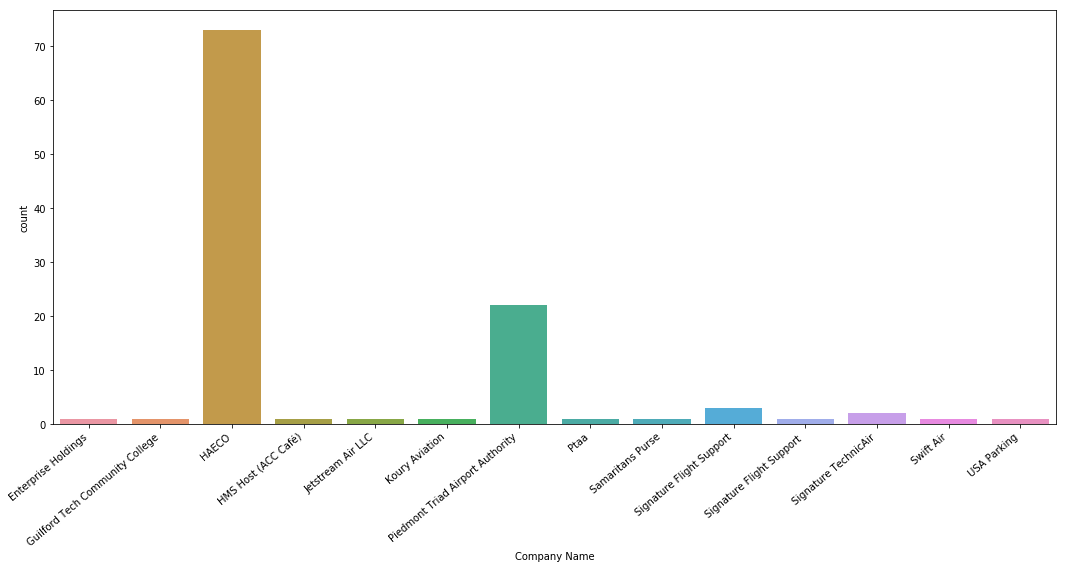

In [4]:
# Show the distribution of responses by company
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Company Name',data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

From the bar plot above, we can see that HAECO had the most employees respond to the survey, the airport had the second most responses. Most other companies had only one response. That one response could be the person who received the survey and did not send it out.

Text(0, 0.5, 'Count')

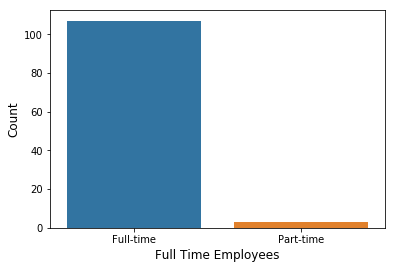

In [5]:
# Show the distribution of employees by employment status
ax = sns.countplot(x='Full_Time',data=df)
ax.set_xlabel('Full Time Employees',fontsize=12)
ax.set_ylabel('Count',fontsize=12)

The plot above shows that an overwhelming majority of respondents are full-time employees

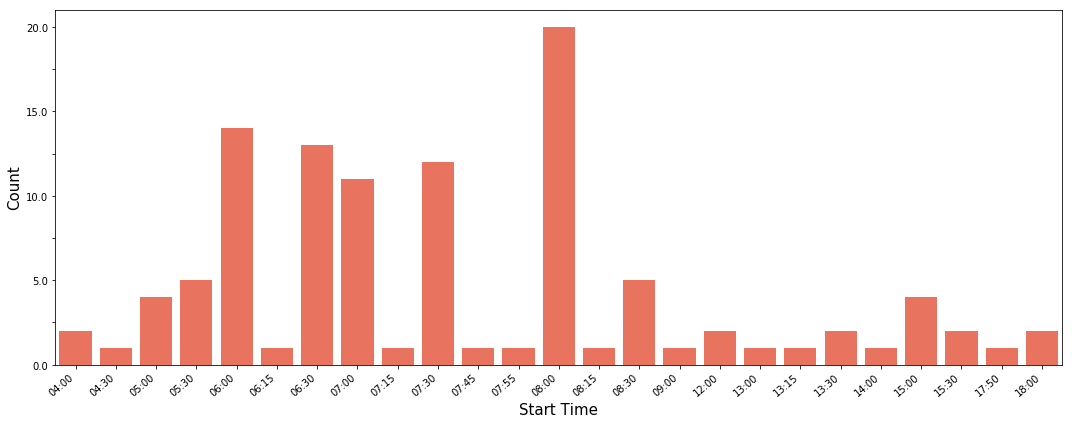

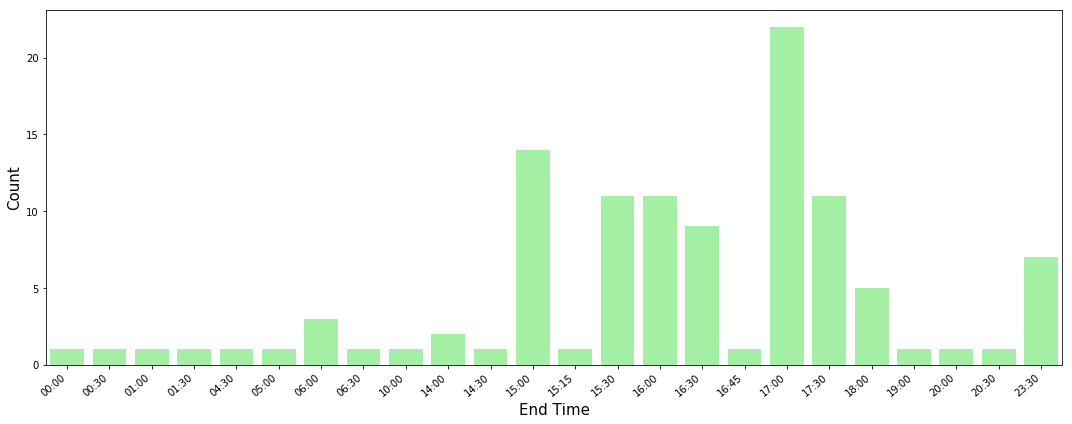

In [6]:
# Show the distribution of start times 
plt.figure(figsize=(15,6))
ax1 = sns.countplot(x='Start Time',data=df.sort_values('Start Time'),color='tomato')

ax1.set_xlabel('Start Time',fontsize=15)
ax1.set_ylabel('Count',fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
for label in ax1.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
plt.tight_layout()
plt.show()

# Show the distribution of end times
plt.figure(figsize=(15,6))
ax2 = sns.countplot(x='End Time',data=df.sort_values('End Time'),color='palegreen')

ax2.set_xlabel('End Time',fontsize=15)
ax2.set_ylabel('Count',fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

From the two plots above, we can see that most start times are between 6:00 AM and 8:00 AM and most end times are between 3:00 PM and 6:00 PM. We can also see that there are some 3rd shift employees with several starting around 3:00 PM and getting off work around 11:30 PM

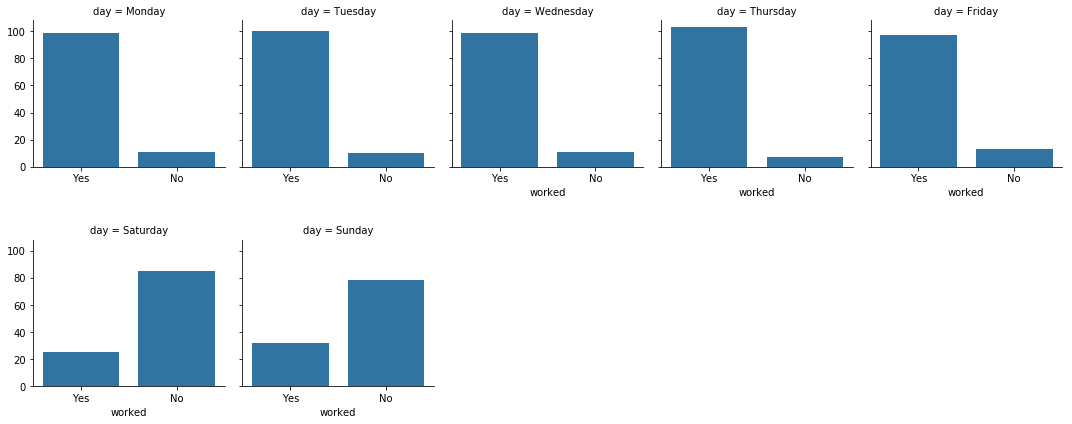

In [31]:
work_days = df[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
df2 = work_days.melt().rename({'variable':'day','value':'worked'}, axis=1)
g = sns.FacetGrid(data=df2, col='day', col_wrap=5)
g.map(sns.countplot,'worked',order=['Yes','No'])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)
for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)

plt.show()

We can see that most respondents work during the week. Roughly 100 employees Monday through Friday. Saturday and Sunday have 25 to 35 people who work on those days. 

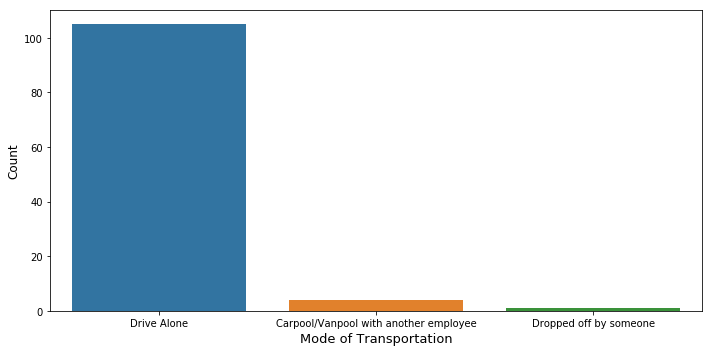

In [8]:
# Show the distribution of transportation to work
plt.figure(figsize=(10,5))
ax = sns.countplot(x='How do you get to work?',data=df)
ax.set_xlabel('Mode of Transportation',fontsize=13)
ax.set_ylabel('Count',fontsize=12)
plt.tight_layout()
plt.show()

The plot above shows that an overwhelming majority of Airport area employees drive alone to work. Only 4 employees carpool and 1 is dropped off by someone else. I am curious if those 4 employees carpool together or if it's two carpool groups.

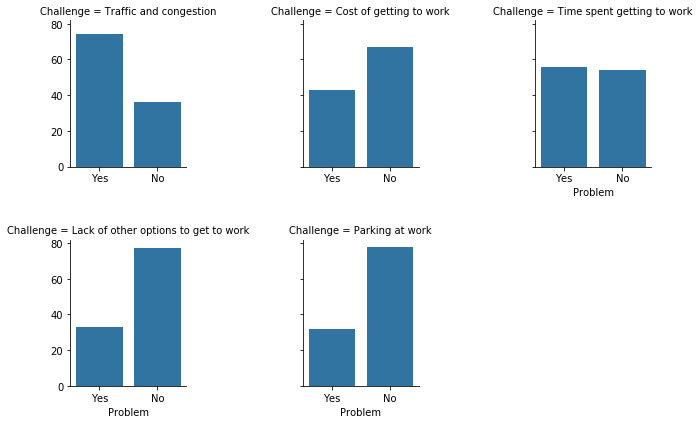

In [32]:
challenges = df[['Traffic and congestion',
                 'Cost of getting to work',
                 'Time spent getting to work',
                 'Lack of other options to get to work',
                 'Parking at work']]

df3 = challenges.melt().rename({'variable':'Challenge','value':'Problem'}, axis=1)
g = sns.FacetGrid(data=df3, col='Challenge', col_wrap=3)
g.map(sns.countplot,'Problem',order=['Yes','No'])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=.5)
for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)

plt.show()

We can see that Traffic and congestion is the biggest challenge for airport area employees getting to work. Respondents were evenly split on Time spent getting to work. Around 40 respondents thought that Cost of getting to work was a challenge for them. Approximately 78 respondents felt that the Lack of other options to get to work and Parking at work were not challenges to their daily commute. 

In [10]:
# Print out the other open ended responses to the question about challenges getting to work
other = df['Other Challenges Getting to Work'].dropna()
other.to_list()
print('These are some of the other challenges airport area commuters face: ')
print('-------------------------------------------------------------------')
for i in other:
    print(i)

These are some of the other challenges airport area commuters face: 
-------------------------------------------------------------------
staying awake at 4 am 
roads are rough. and filled with dips, and pot holes
Out of way options to get to work, especially during accidents/incidents on HWY68 South
Lack of desire to go to work
BIG TRUCKS DRIVING ON RADAR ROAD & STOPPING
Gas Stations
N/A   LEAVE WITHIN 15 MINUTES TO WORK
no challenges
Being on time if not driving your own car


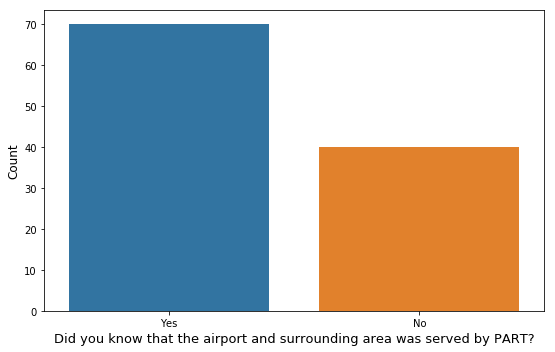

In [11]:
# Plot the responses for the question Did you know that the airport is served by PART
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Did you know that the airport and surrounding area was served by PART',data=df)
ax.set_xlabel('Did you know that the airport and surrounding area was served by PART?',fontsize=13)
ax.set_ylabel('Count',fontsize=12)
plt.tight_layout()
plt.show()

Based on the responses, it looks like a majority of the airport area employees know that the area is served by PART. Let's look at if they would consider taking PART.

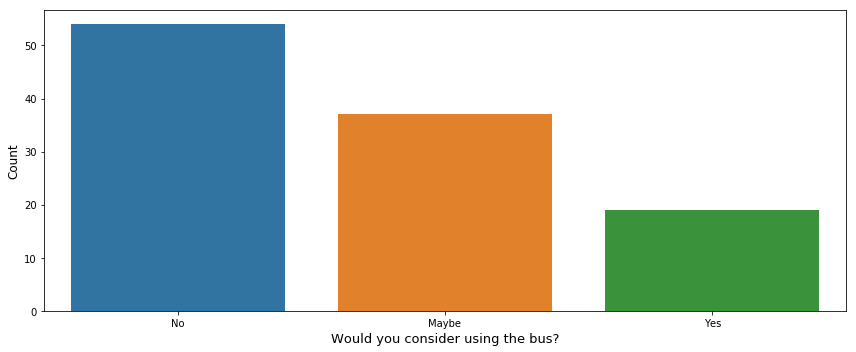

In [12]:
# Plot the responses for the question Would you consider using the bus
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Would you consider using the bus',data=df)
ax.set_xlabel('Would you consider using the bus?',fontsize=13)
ax.set_ylabel('Count',fontsize=12)
plt.tight_layout()
plt.show()

While many respondents know about PART's service, it seems that not that many would be willing to try the service. Let's see why not.

In [1]:
# Import warnings library to remove FutureWarning warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

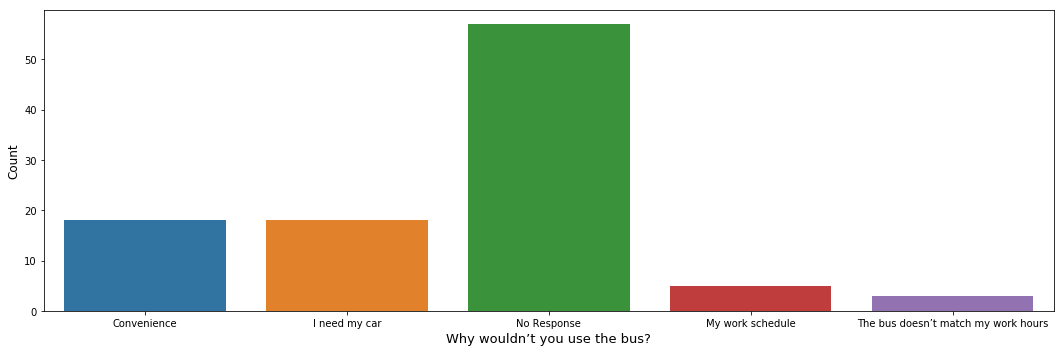

In [14]:
no_bus = df[(df["Why wouldn’t you use the bus?"] == 'Convenience') | 
            (df["Why wouldn’t you use the bus?"] == 'I need my car') | 
            (df["Why wouldn’t you use the bus?"] == 'No Response') | 
            (df["Why wouldn’t you use the bus?"] == 'My work schedule') |
            (df["Why wouldn’t you use the bus?"] == 'The bus doesn’t match my work hours')]

# Plot the responses for the question Why wouldn't you use the bus
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Why wouldn’t you use the bus?',data=no_bus)
ax.set_xlabel('Why wouldn’t you use the bus?',fontsize=13)
ax.set_ylabel('Count',fontsize=12)
plt.tight_layout()
plt.show()

In [15]:
no_bus2 = df[(df["Why wouldn’t you use the bus?"] != 'Convenience') & 
            (df["Why wouldn’t you use the bus?"] != 'I need my car') & 
            (df["Why wouldn’t you use the bus?"] != 'No Response') & 
            (df["Why wouldn’t you use the bus?"] != 'My work schedule') &
            (df["Why wouldn’t you use the bus?"] != 'The bus doesn’t match my work hours')]

print('These are the open ended responses for why people would not ride the bus:')
print('-------------------------------------------------------------------------')
for i in no_bus2["Why wouldn’t you use the bus?"].tolist():
    print(i)

These are the open ended responses for why people would not ride the bus:
-------------------------------------------------------------------------
I live in Siler City. No bus travels that far
where i live no bus
I live to far
There are no bus options where I live
No pick up at my address, would have to drive to bus pick up.
Does not go to may area where I live
I live 8 minutes from work. Electric car.
I’m not familiar with how it works.
I live in another County 


The biggest obstacle for people trying PART is convenience and the fact that they need their car. From the open ended responses, people say they live too far away to catch the bus. For the respondent living in Siler City, that statement could be true. A geographical analysis can be performed to determine if there is a park and ride lot close by for some of these other respondents. 